In [1]:
import pandas as pd

# Load MCC Lookup File
mcc_lookup_path = "../data/processed_data/mcc_lookup.pkl"

# Load MCC lookup dictionary
mcc_lookup = pd.read_pickle(mcc_lookup_path)

# Display sample MCC mappings
print("Sample MCC Lookup:")
print(pd.DataFrame(list(mcc_lookup.items()), columns=['mcc_code', 'mcc_description']).head())

Sample MCC Lookup:
   mcc_code                       mcc_description
0      5812         Eating Places and Restaurants
1      5541                      Service Stations
2      7996  Amusement Parks, Carnivals, Circuses
3      5411          Grocery Stores, Supermarkets
4      4784                 Tolls and Bridge Fees


In [2]:
# Convert MCC lookup dictionary to a DataFrame
mcc_lookup_df = pd.DataFrame(list(mcc_lookup.items()), columns=['mcc_code', 'mcc_description'])

# Save as CSV for future use (for backend/frontend)
mcc_lookup_df.to_csv("../data/processed_data/mcc_lookup.csv", index=False)

print("MCC lookup saved as CSV for easy reference!")
print(mcc_lookup_df.head())  # Display first few rows

MCC lookup saved as CSV for easy reference!
   mcc_code                       mcc_description
0      5812         Eating Places and Restaurants
1      5541                      Service Stations
2      7996  Amusement Parks, Carnivals, Circuses
3      5411          Grocery Stores, Supermarkets
4      4784                 Tolls and Bridge Fees


In [5]:
import pandas as pd

# Load processed transactions
transactions_df = pd.read_csv("../data/processed_data/processed_transactions.csv")

# Load processed users
users_df = pd.read_csv("../data/processed_data/processed_users.csv")

# Display column names to check if 'id' exists
print("Transactions columns:", transactions_df.columns)
print("Users columns:", users_df.columns)

# Merge transactions with users on 'client_id' (transactions) and 'id' (users)
merged_df = transactions_df.merge(users_df, left_on="client_id", right_on="id", how="left")

# Verify if 'id' exists before dropping
if "id" in merged_df.columns:
    merged_df = merged_df.drop(columns=["id"])
    print(" 'id' column dropped!")
else:
    print("️ 'id' column not found. Skipping drop step.")

# Display merged data info
print(" Merged Data Overview:")
print(merged_df.info(), "\n")

# Show sample rows
print(merged_df.head())

# Save merged data for further steps
merged_df.to_csv("../data/processed_data/merged_data.csv", index=False)
print(" Merged dataset saved successfully!")

Transactions columns: Index(['id', 'date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year',
       'month', 'day', 'weekday', 'weekday_num', 'is_refund', 'mcc_freq',
       'merchant_city_freq', 'use_chip_Online Transaction',
       'use_chip_Swipe Transaction', 'amount_log', 'weekday_encoded'],
      dtype='object')
Users columns: Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male'],
      dtype='object')
️ 'id' column not found. Skipping drop step.
 Merged Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 31 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id_x                         int64  
 1   date                         object 
 2   client_id                    int64  
 3   card_id             

In [6]:
# Display all column names with data types
print("Columns in merged dataset:\n")
print(merged_df.dtypes)

# Check for duplicate or unnecessary columns
print("\nChecking for redundant columns...\n")

Columns in merged dataset:

id_x                             int64
date                            object
client_id                        int64
card_id                          int64
amount                         float64
merchant_id                      int64
year                             int64
month                            int64
day                              int64
weekday                         object
weekday_num                      int64
is_refund                        int64
mcc_freq                       float64
merchant_city_freq             float64
use_chip_Online Transaction       bool
use_chip_Swipe Transaction        bool
amount_log                     float64
weekday_encoded                float64
id_y                             int64
current_age                      int64
retirement_age                   int64
birth_year                       int64
birth_month                      int64
latitude                       float64
longitude                      float

In [7]:
# Drop redundant columns
columns_to_drop = ["id_x", "id_y"]  # These were from the merge step
merged_df = merged_df.drop(columns=columns_to_drop, errors="ignore")

# Confirm the columns are removed
print("Updated Columns after dropping redundant ones:\n", merged_df.columns)

Updated Columns after dropping redundant ones:
 Index(['date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year',
       'month', 'day', 'weekday', 'weekday_num', 'is_refund', 'mcc_freq',
       'merchant_city_freq', 'use_chip_Online Transaction',
       'use_chip_Swipe Transaction', 'amount_log', 'weekday_encoded',
       'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male'],
      dtype='object')


In [8]:
# Convert 'date' to datetime format
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")

# Extract useful features from 'date'
merged_df["transaction_hour"] = merged_df["date"].dt.hour
merged_df["transaction_day_of_week"] = merged_df["date"].dt.dayofweek  # Monday=0, Sunday=6
merged_df["transaction_week_of_year"] = merged_df["date"].dt.isocalendar().week
merged_df["transaction_month"] = merged_df["date"].dt.month

# Confirm new features
print("Newly added time-based features:\n", merged_df[["transaction_hour", "transaction_day_of_week", "transaction_week_of_year", "transaction_month"]].head())

Newly added time-based features:
    transaction_hour  transaction_day_of_week  transaction_week_of_year  \
0                 0                        4                        53   
1                 0                        4                        53   
2                 0                        4                        53   
3                 0                        4                        53   
4                 0                        4                        53   

   transaction_month  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


In [9]:
# Check if the date format is correct
print("Date Format Check:")
print(merged_df["date"].head())
print("\nUnique Week Numbers in Dataset:", merged_df["transaction_week_of_year"].unique())

Date Format Check:
0   2010-01-01 00:01:00
1   2010-01-01 00:02:00
2   2010-01-01 00:02:00
3   2010-01-01 00:05:00
4   2010-01-01 00:06:00
Name: date, dtype: datetime64[ns]

Unique Week Numbers in Dataset: <IntegerArray>
[53,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
Length: 53, dtype: UInt32


In [10]:
print("Merged Data Overview:\n")
print(merged_df.info(), "\n")
print("Sample Rows:\n", merged_df.head())

Merged Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 33 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   date                         datetime64[ns]
 1   client_id                    int64         
 2   card_id                      int64         
 3   amount                       float64       
 4   merchant_id                  int64         
 5   year                         int64         
 6   month                        int64         
 7   day                          int64         
 8   weekday                      object        
 9   weekday_num                  int64         
 10  is_refund                    int64         
 11  mcc_freq                     float64       
 12  merchant_city_freq           float64       
 13  use_chip_Online Transaction  bool          
 14  use_chip_Swipe Transaction   bool          
 15  amount_log              

In [11]:
# Convert boolean columns to integers
bool_cols = ["use_chip_Online Transaction", "use_chip_Swipe Transaction"]
merged_df[bool_cols] = merged_df[bool_cols].astype(int)

# Verify the conversion
print("Updated Data Types After Boolean Conversion:\n", merged_df[bool_cols].dtypes)
print("\nSample Values After Conversion:\n", merged_df[bool_cols].head())

Updated Data Types After Boolean Conversion:
 use_chip_Online Transaction    int64
use_chip_Swipe Transaction     int64
dtype: object

Sample Values After Conversion:
    use_chip_Online Transaction  use_chip_Swipe Transaction
0                            0                           1
1                            0                           1
2                            0                           1
3                            0                           1
4                            0                           1


In [12]:
# Drop text-based weekday column (redundant)
merged_df = merged_df.drop(columns=["weekday"], errors="ignore")

# Confirm column is dropped
print("Columns after dropping redundant categorical features:\n", merged_df.columns)

Columns after dropping redundant categorical features:
 Index(['date', 'client_id', 'card_id', 'amount', 'merchant_id', 'year',
       'month', 'day', 'weekday_num', 'is_refund', 'mcc_freq',
       'merchant_city_freq', 'use_chip_Online Transaction',
       'use_chip_Swipe Transaction', 'amount_log', 'weekday_encoded',
       'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male',
       'transaction_hour', 'transaction_day_of_week',
       'transaction_week_of_year', 'transaction_month'],
      dtype='object')


In [13]:
# Extract useful date features
merged_df["transaction_year"] = merged_df["date"].dt.year
merged_df["transaction_quarter"] = merged_df["date"].dt.quarter
merged_df["transaction_day"] = merged_df["date"].dt.day

# Drop original date column
merged_df = merged_df.drop(columns=["date"], errors="ignore")

# Confirm new features and dropped date
print("Updated Columns After Date Processing:\n", merged_df.columns)
print("\nSample Data:\n", merged_df.head())

Updated Columns After Date Processing:
 Index(['client_id', 'card_id', 'amount', 'merchant_id', 'year', 'month', 'day',
       'weekday_num', 'is_refund', 'mcc_freq', 'merchant_city_freq',
       'use_chip_Online Transaction', 'use_chip_Swipe Transaction',
       'amount_log', 'weekday_encoded', 'current_age', 'retirement_age',
       'birth_year', 'birth_month', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards', 'gender_Male', 'transaction_hour',
       'transaction_day_of_week', 'transaction_week_of_year',
       'transaction_month', 'transaction_year', 'transaction_quarter',
       'transaction_day'],
      dtype='object')

Sample Data:
    client_id  card_id    amount  merchant_id  year  month  day  weekday_num  \
0       1556     2972  4.356709        59935  2010      1    1            4   
1        561     4575  2.745346        67570  2010      1    1            4   
2       1129      102  4.394449       

In [14]:
# Save the final processed dataset
final_data_path = "../data/processed_data/final_processed_data.csv"
merged_df.to_csv(final_data_path, index=False)

print(f"Final processed dataset saved successfully at: {final_data_path}")

Final processed dataset saved successfully at: ../data/processed_data/final_processed_data.csv


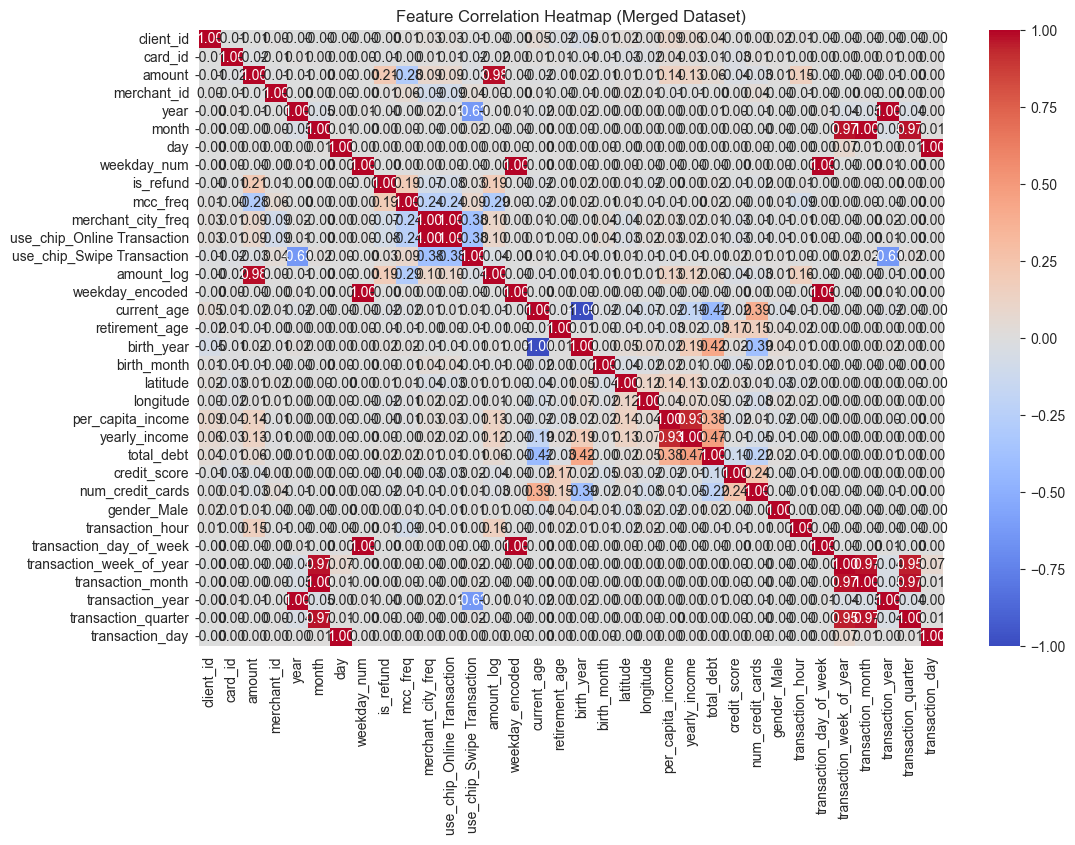

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = merged_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Feature Correlation Heatmap (Merged Dataset)")
plt.show()

In [19]:
print(merged_df.columns)

Index(['client_id', 'card_id', 'amount', 'merchant_id', 'year', 'month', 'day',
       'weekday_num', 'is_refund', 'mcc_freq', 'merchant_city_freq',
       'use_chip_Swipe Transaction', 'current_age', 'retirement_age',
       'birth_month', 'latitude', 'longitude', 'per_capita_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender_Male',
       'transaction_hour'],
      dtype='object')


In [22]:
import pandas as pd

# Load the final processed dataset
file_path = "../data/processed_data/final_processed_data.csv"
df = pd.read_csv(file_path)

# Check the dataset structure
print(" Dataset Loaded Successfully!")
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

# Display first few rows for verification
print("\nSample Data:\n", df.head())

 Dataset Loaded Successfully!
Dataset Shape: (13305915, 34)

Column Names: Index(['client_id', 'card_id', 'amount', 'merchant_id', 'year', 'month', 'day',
       'weekday_num', 'is_refund', 'mcc_freq', 'merchant_city_freq',
       'use_chip_Online Transaction', 'use_chip_Swipe Transaction',
       'amount_log', 'weekday_encoded', 'current_age', 'retirement_age',
       'birth_year', 'birth_month', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards', 'gender_Male', 'transaction_hour',
       'transaction_day_of_week', 'transaction_week_of_year',
       'transaction_month', 'transaction_year', 'transaction_quarter',
       'transaction_day'],
      dtype='object')

Missing Values:
 client_id                      0
card_id                        0
amount                         0
merchant_id                    0
year                           0
month                          0
day                            0
weekda

In [23]:
# Define redundant features to drop
columns_to_drop = [
    "client_id", "card_id", "merchant_id",  # Identifiers
    "latitude", "longitude",  # Geospatial features
    "amount_log",  # Highly correlated with 'amount'
    "weekday_encoded",  # Redundant with 'weekday_num'
    "retirement_age"  # Less relevant to prediction
]

# Drop the columns
df = df.drop(columns=columns_to_drop, errors="ignore")

# Verify the new shape
print("Redundant Features Removed!")
print("Updated dataset shape:", df.shape)
print("\nUpdated Column Names:", df.columns)

Redundant Features Removed!
Updated dataset shape: (13305915, 26)

Updated Column Names: Index(['amount', 'year', 'month', 'day', 'weekday_num', 'is_refund',
       'mcc_freq', 'merchant_city_freq', 'use_chip_Online Transaction',
       'use_chip_Swipe Transaction', 'current_age', 'birth_year',
       'birth_month', 'per_capita_income', 'yearly_income', 'total_debt',
       'credit_score', 'num_credit_cards', 'gender_Male', 'transaction_hour',
       'transaction_day_of_week', 'transaction_week_of_year',
       'transaction_month', 'transaction_year', 'transaction_quarter',
       'transaction_day'],
      dtype='object')


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y) - Adjust based on the model's requirements
X = df.drop(columns=["is_refund"])  # Assuming "is_refund" is our target (Adjust if needed)
y = df["is_refund"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model to get feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Create a DataFrame with feature importance scores
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top important features
print("\n Feature Importance Scores (Top Features):\n", feature_importance.head(10))


 Feature Importance Scores (Top Features):
                      Feature  Importance
0                     amount    0.304670
5                   mcc_freq    0.227674
3                        day    0.043950
24           transaction_day    0.043882
20  transaction_week_of_year    0.039073
18          transaction_hour    0.032734
6         merchant_city_freq    0.027521
22          transaction_year    0.026986
1                       year    0.026940
4                weekday_num    0.026051


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define model for RFE
estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=10)  # Selecting Top 10 Features

# Fit RFE
selector.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X.columns[selector.support_].tolist()
print("\n Final Selected Features Using RFE:\n", selected_features)

# Keep only selected features in the dataset
df = df[selected_features + ["is_refund"]]  # Ensure target is included


 Final Selected Features Using RFE:
 ['amount', 'mcc_freq', 'merchant_city_freq', 'use_chip_Online Transaction', 'per_capita_income', 'yearly_income', 'total_debt', 'num_credit_cards', 'transaction_hour', 'transaction_week_of_year']


In [26]:
df.to_csv("../data/processed_data/final_selected_features.csv", index=False)
print("Final selected features dataset saved successfully!")

Final selected features dataset saved successfully!


In [27]:
print("Final Dataset Shape:", df.shape)
print("\nFinal Selected Columns:\n", df.columns)

Final Dataset Shape: (13305915, 11)

Final Selected Columns:
 Index(['amount', 'mcc_freq', 'merchant_city_freq',
       'use_chip_Online Transaction', 'per_capita_income', 'yearly_income',
       'total_debt', 'num_credit_cards', 'transaction_hour',
       'transaction_week_of_year', 'is_refund'],
      dtype='object')


In [28]:
print("\nData Types in Final Dataset:\n")
print(df.dtypes)


Data Types in Final Dataset:

amount                         float64
mcc_freq                       float64
merchant_city_freq             float64
use_chip_Online Transaction      int64
per_capita_income              float64
yearly_income                  float64
total_debt                     float64
num_credit_cards                 int64
transaction_hour                 int64
transaction_week_of_year         int64
is_refund                        int64
dtype: object


In [29]:
print("\nDataset Statistical Summary:\n")
print(df.describe())


Dataset Statistical Summary:

             amount      mcc_freq  merchant_city_freq  \
count  1.330592e+07  1.330592e+07        1.330592e+07   
mean   3.352123e+00  6.127842e-02        1.430864e-02   
std    1.236717e+00  4.091691e-02        3.536577e-02   
min    0.000000e+00  2.397430e-05        7.515454e-08   
25%    2.545531e+00  3.572727e-02        3.878725e-04   
50%    3.577948e+00  5.066431e-02        9.055779e-04   
75%    4.276666e+00  1.070735e-01        2.800317e-03   
max    6.873368e+00  1.196899e-01        1.111112e-01   

       use_chip_Online Transaction  per_capita_income  yearly_income  \
count                 1.330592e+07       1.330592e+07   1.330592e+07   
mean                  1.170842e-01       2.295078e+04   4.472231e+04   
std                   3.215206e-01       7.889597e+03   1.710165e+04   
min                   0.000000e+00       2.632250e+03   2.998500e+03   
25%                   0.000000e+00       1.711300e+04   3.281700e+04   
50%                   0

In [33]:
import pandas as pd

# Load the dataset
file_path = "../data/processed_data/final_selected_features.csv"
final_selected_features = pd.read_csv(file_path)

# Display first few rows
print(final_selected_features.head())

# Check columns to verify existing features
print("Columns in Dataset:", final_selected_features.columns.tolist())

     amount  mcc_freq  merchant_city_freq  use_chip_Online Transaction  \
0  4.356709  0.109791            0.000116                        False   
1  2.745346  0.035727            0.000027                        False   
2  4.394449  0.044277            0.000475                        False   
3  5.303305  0.044277            0.001294                        False   
4  3.858833  0.018681            0.000204                        False   

   per_capita_income  yearly_income  total_debt  num_credit_cards  \
0            23679.0        48277.0    110153.0                 4   
1            18076.0        36853.0    112139.0                 5   
2            16894.0        34449.0     36540.0                 3   
3            26168.0        53350.0    128676.0                 5   
4            33529.0        68362.0     96182.0                 2   

   transaction_hour  transaction_week_of_year  is_refund   mcc  \
0                 0                        53          1  5499   
1       

In [34]:
# Recalculatinf spending_ratio
final_selected_features["spending_ratio"] = final_selected_features["amount"] / final_selected_features["yearly_income"]

# Recalculate monthly_avg_spend (Rolling Mean)
final_selected_features["monthly_avg_spend"] = (
    final_selected_features.groupby("merchant_category_encoded")["amount"]
    .transform(lambda x: x.rolling(30, min_periods=1).mean())
)

In [35]:
final_selected_features.to_csv("../data/processed_data/final_selected_features.csv", index=False)
print(" Updated dataset saved successfully!")

 Updated dataset saved successfully!


In [36]:
df = pd.read_csv("../data/processed_data/final_selected_features.csv")

required_features = ["spending_ratio", "monthly_avg_spend"]
for feature in required_features:
    if feature in df.columns:
        print(f" {feature} is present in the dataset.")
    else:
        print(f" {feature} is NOT found in the dataset.")

 spending_ratio is present in the dataset.
 monthly_avg_spend is present in the dataset.
